### Módulo 24 - Combinação de modelos II

## Tarefa 1

1 - Cite 5 diferenças entre o RandomForest e o AdaBoost.

2 - Acesse o link [Scikit-learn - adaboost](https://scikit-learn.org/stable/modules/ensemble.html), leia a explicação (traduza se for preciso) e crie um jupyternotebook contendo o exemplo do AdaBoost.

3 - Cite 5 Hyperparametrosimportantes no AdaBoost.

4 - Utilize o GridSearchpara encontrar os melhores hyperparametrospara o conjunto de dados do exemplo (load_iris).

1

1.1 - Método de construção de modelo: O Random Forest é um algoritmo de conjunto baseado em árvore que combina várias árvores de decisão independentes para construir um modelo mais forte. Já o AdaBoost é um algoritmo de conjunto baseado em peso que usa várias versões do mesmo modelo de base para construir um modelo mais forte.

1.2 - Seleção de características: O Random Forest seleciona um subconjunto aleatório de características em cada divisão de árvore para garantir que cada árvore no conjunto seja diferente. Já o AdaBoost atribui pesos às características com base em seu desempenho e dá mais peso às características que funcionaram bem nas iterações anteriores.

1.3 - Sensibilidade ao ruído: O Random Forest é menos sensível ao ruído do que o AdaBoost, o que significa que o desempenho do Random Forest é mais robusto em dados com ruído. Já o AdaBoost pode ser mais propenso a sobreajuste em dados com ruído.

1.4 - Velocidade de treinamento: O Random Forest é geralmente mais rápido para treinar do que o AdaBoost, pois cada árvore pode ser construída independentemente das outras. Já o AdaBoost requer várias iterações para ajustar os pesos das instâncias e obter o modelo final.

1.5 - Paralelização: O Random Forest pode ser facilmente paralelizado em várias CPUs, pois cada árvore pode ser construída independentemente. Já o AdaBoost é mais difícil de paralelizar, pois cada iteração depende dos resultados da iteração anterior.

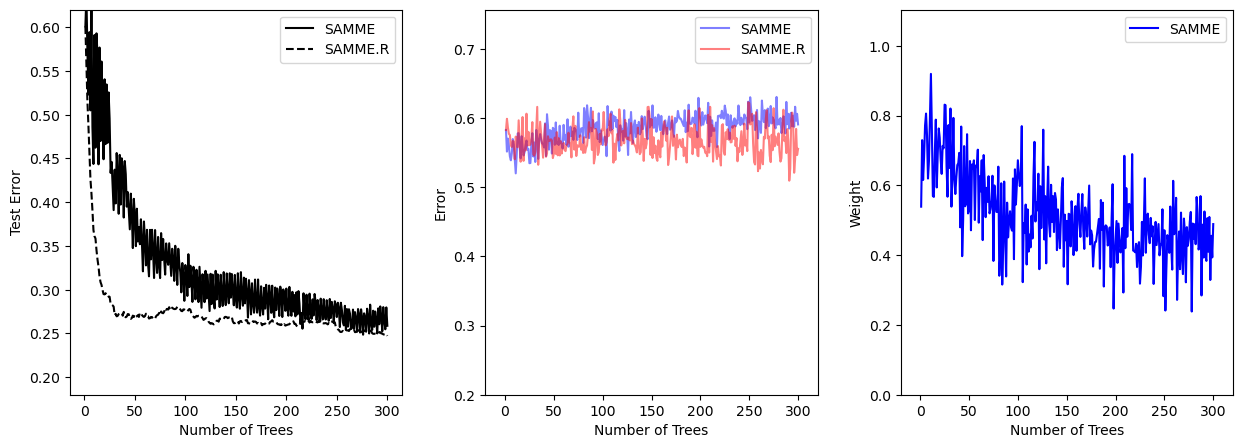

In [1]:
#2

import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X, y = make_gaussian_quantiles(
    n_samples=13000, n_features=10, n_classes=3, random_state=1
)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_test_predict in zip(
    bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)
):
    real_test_errors.append(1.0 - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(1.0 - accuracy_score(discrete_test_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1), discrete_test_errors, c="black", label="SAMME")
plt.plot(
    range(1, n_trees_real + 1),
    real_test_errors,
    c="black",
    linestyle="dashed",
    label="SAMME.R",
)
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

plt.subplot(132)
plt.plot(
    range(1, n_trees_discrete + 1),
    discrete_estimator_errors,
    "b",
    label="SAMME",
    alpha=0.5,
)
plt.plot(
    range(1, n_trees_real + 1), real_estimator_errors, "r", label="SAMME.R", alpha=0.5
)
plt.legend()
plt.ylabel("Error")
plt.xlabel("Number of Trees")
plt.ylim((0.2, max(real_estimator_errors.max(), discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights, "b", label="SAMME")
plt.legend()
plt.ylabel("Weight")
plt.xlabel("Number of Trees")
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

3

3.1 - n_estimators: n_estimators : int, padrão=50 O número máximo de estimadores em que o aumento é encerrado. Em caso de encaixe perfeito, o procedimento de aprendizagem é interrompido precocemente. Os valores devem estar no intervalo .[1, inf)

3.2 - learning_rate: learning_rate : float, padrão=1.0 Peso aplicado a cada regressor em cada iteração de reforço. Um maior A taxa de aprendizagem aumenta a contribuição de cada regressor. Há um trade-off entre os parâmetros e . Os valores devem estar no intervalo .learning_raten_estimators(0.0, in

3.3 - base_estimator: base_estimator : objeto, default=Nenhum O estimador de base a partir do qual o conjunto impulsionado é construído. Se , então o estimador base é inicializado com .Nonemax_depth=3

3.4 - max_depth: O hiperparâmetro max_depth controla a profundidade máxima da árvore de decisão. Esse hiperparâmetro pode ajudar a evitar o sobreajuste, limitando o número de recursos que o modelo pode considerar durante o treinamento.

3.5 - min_samples_split: Esse hiperparâmetro define o número mínimo de amostras necessárias para dividir um nó em uma árvore de decisão. Um valor baixo pode levar a overfitting, enquanto um valor alto pode tornar a árvore muito rasa e incapaz de aprender com dados mais complexos.

In [2]:
#4
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9466666666666665

In [3]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


In [4]:
X, y = load_diabetes(return_X_y=True)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [5]:
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

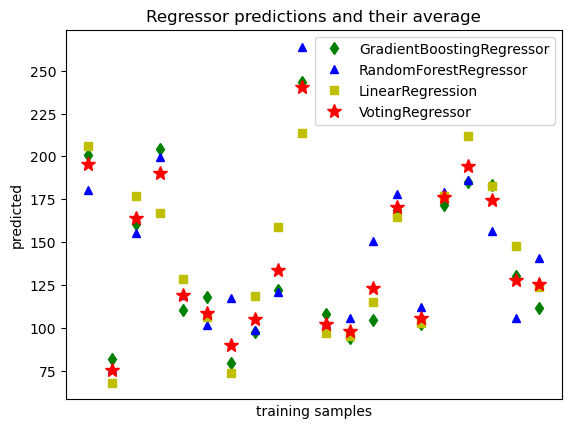

In [6]:
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()